In [33]:
import pandas as pd
from glob import glob
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with pd.HDFStore('../data/audio_munged.hdf5') as hdf:
    # This prints a list of all group names:
    print(hdf.keys())

['/h5io/key_data', '/h5io/key_meta']


In [23]:
f = pd.read_hdf('../data/audio_munged.hdf5', '/h5io/key_data')
f.index

Float64Index([                   0.0, 0.00045351473922902497,
               0.0009070294784580499,  0.0013605442176870747,
               0.0018140589569160999,  0.0022675736961451248,
               0.0027210884353741495,  0.0031746031746031746,
               0.0036281179138321997,   0.004081632653061225,
              ...
                    3.99546485260771,     3.9959183673469387,
                   3.996371882086168,      3.996825396825397,
                  3.9972789115646257,      3.997732426303855,
                   3.998185941043084,      3.998639455782313,
                   3.999092970521542,      3.999546485260771],
             dtype='float64', name='time', length=8820)

#### Inspecting the classification data
- The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally.

In [29]:
train_set = '../data/set_b/'
train_files = glob(train_set+'*.wav')
# include only normal and murmur
train_files = [file for file in train_files if 'normal' in file or 'murmur' in file]
# filter noisy normal and noisy murmur
audio_files = [file for file in train_files if not 'noisymurmur' in file or 'nosiynormal' in file]
audio_files[:10]

['../data/set_b\\murmur__112_1306243000964_A.wav',
 '../data/set_b\\murmur__112_1306243000964_B.wav',
 '../data/set_b\\murmur__112_1306243000964_D.wav',
 '../data/set_b\\murmur__116_1306258689913_A.wav',
 '../data/set_b\\murmur__116_1306258689913_C.wav',
 '../data/set_b\\murmur__116_1306258689913_D.wav',
 '../data/set_b\\murmur__122_1306325762831_C.wav',
 '../data/set_b\\murmur__122_1306325762831_D.wav',
 '../data/set_b\\murmur__156_1306936373241_B.wav',
 '../data/set_b\\murmur__160_1307100683334_A.wav']

In [32]:
# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

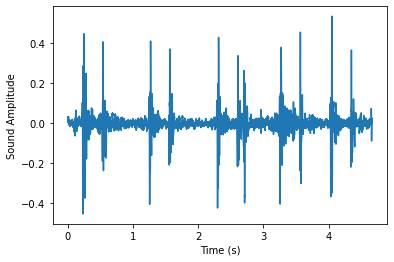

In [34]:
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

##### Conclusion : There are several seconds of heartbeat sounds in here, though note that most of this time is silence. A common procedure in machine learning is to separate the datapoints with lots of stuff happening from the ones that don't.

### Inspecting the regression data
- dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If we can model the value of a company as it changes over time, we can make predictions about where that company will be in the future.

In [79]:
# Read in the data
data = pd.read_csv('../data/prices.csv', index_col=0)
data_1 = data[data['symbol'].str.contains('V')]
data_2 = data[data['symbol'].str.contains('AAPL')]
data_3 = data[data['symbol'].str.contains('NFLX')]
data_4 = data[data['symbol'].str.contains('XOM')]
# data_5 = data[data['symbol'].str.contains('FB')]
data = pd.concat([data_1, data_2, data_3, data_4], axis=0)
print(data.symbol.unique())
data = data.drop(['volume'], axis=1)
data.head()

['NVDA' 'V' 'VZ' 'AAPL' 'NFLX' 'XOM']


,symbol,close
date,,
2010-01-04,NVDA,18.490000
2010-01-04,V,88.139999
2010-01-04,VZ,33.279869
2010-01-05,NVDA,18.760000
2010-01-05,V,87.129997


In [80]:
df = data.pivot_table('close','date', 'symbol')
df

symbol,AAPL,NFLX,NVDA,V,VZ,XOM
date,,,,,,
2010-01-04,214.009998,53.479999,18.490000,88.139999,33.279869,69.150002
2010-01-05,214.379993,51.510001,18.760000,87.129997,33.339868,69.419998
2010-01-06,210.969995,53.319999,18.879999,85.959999,31.919873,70.019997
2010-01-07,210.580000,52.400001,18.510000,86.760002,31.729875,69.800003
2010-01-08,211.980005,53.300002,18.549999,87.000000,31.749874,69.519997
...,...,...,...,...,...,...
2016-12-23,116.519997,125.589996,109.779999,78.150002,53.680000,90.709999
2016-12-27,117.260002,128.350006,117.320000,78.349998,53.639999,90.750000
2016-12-28,116.760002,125.889999,109.250000,78.300003,53.439999,90.300003


           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0
symbol


TypeError: no numeric data to plot

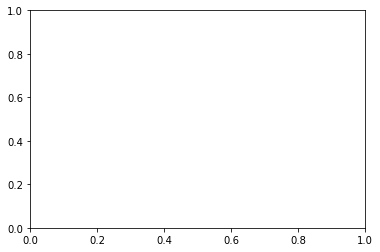

In [38]:
# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    print(column)
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()